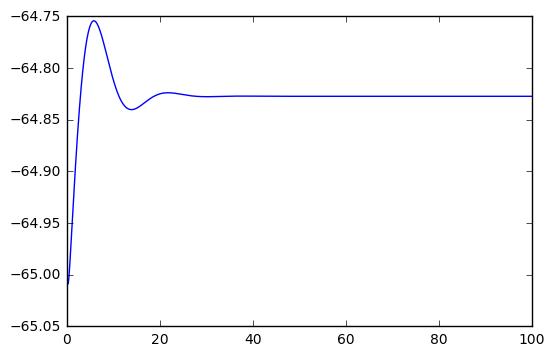

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Ie_ov_A = 2 # current that initiate a single action potential

# variables related to n
an=lambda v: 0.01*(v + 55)/ (1 - np.exp(-0.1*(v+55))) 
bn= lambda v: 0.125 * np.exp(- 0.0125*(v + 65))
n_inf = lambda v: an(v)/(an(v) + bn(v))
tau_n = lambda v: 1/(an(v) + bn(v))

# variables related to m
am=lambda v: 0.1*(v + 40)/ (1 - np.exp(-0.1*(v + 40))) 
bm= lambda v: 4* np.exp(- 0.0556 * (v + 65))
m_inf = lambda v: am(v)/(am(v) + bm(v))
tau_m = lambda v: 1/(am(v) + bm(v))

# variables related to h
ah=lambda v: 0.07 * np.exp(- 0.05 * (v + 65)) 
bh= lambda v: 1/(1 + np.exp(- 0.1*(v + 35)))
h_inf = lambda v: ah(v)/(ah(v) + bh(v))
tau_h = lambda v: 1/(ah(v) + bh(v))


T = 100
cm = 10 
EL = -54.387
EK = -77 
ENa = 50
# to get the unit right
gL_bar = 0.003 * 1000 # in uS/mm^2
gK_bar = 0.36 * 1000 #  in uS/mm^2
gNa_bar = 1.2 * 1000 #  in uS/mm^2

# initial values 
vi = -65
mi = 0.0529
hi = 0.5961
ni = 0.3177

# set time
dt =  0.001
t = np.arange(0, T, dt)

# parameters for the axon
#N= 2
#r = 2 # um 
#l = 100 # um

gA_bar = 1/(2*r*(l**2)) * (10**3) # mS/mm^2

V = np.zeros(len(t))
m = np.zeros(len(t))
h = np.zeros(len(t))
n = np.zeros(len(t))

#v_axon[0, :] = vi
#m[0, :] = mi
#h[0, :] = hi
#n[0, :] = ni

def dALLdt(X, t):
    V, m, h, n = X
    
    #calculate membrane potential & activation variables
    Im = gL_bar*(EL - V) + gK_bar* np.power(n,4)*(EK - V) + gNa_bar*np.power(m,3)*h*(ENa - V)
    dVdt = (Ie_ov_A+Im) / cm
    dmdt = (m_inf(V) - m)/tau_m(V)
    dhdt = (h_inf(V) - h)/tau_h(V)
    dndt = (n_inf(V) - n)/tau_n(V)
    return dVdt, dmdt, dhdt, dndt
    
X = odeint(dALLdt, [-65, 0.05, 0.6, 0.32], t)
# for i in np.arange(1,len(t)):
#     n[i,:]  =  n_inf(v_axon[i-1,:]) + (n[i-1,:] - n_inf(v_axon[i-1,:])) * np.exp(-dt/tau_n(v_axon[i-1,:]))
#     m[i,:]  =  m_inf(v_axon[i-1,:]) + (m[i-1,:] - m_inf(v_axon[i-1,:])) * np.exp(-dt/tau_m(v_axon[i-1,:]))
#     h[i,:]  =  h_inf(v_axon[i-1,:]) + (h[i-1,:] - h_inf(v_axon[i-1,:])) * np.exp(-dt/tau_h(v_axon[i-1,:]))
#     Im = gL_bar*(EL - v_axon[i-1,:]) + gK_bar* np.power(n[i-1,:],4)*(EK - v_axon[i-1,:]) + gNa_bar*np.power(m[i-1,:],3)*h[i-1,:]*(ENa - v_axon[i-1,:])
#     dv = dt/cm*(-Im + Ie_ov_A) 
#     v_axon[i,:] = v_axon[i-1,:] +dv
# #     # first compartment  
# #     dv1 = dt/cm*(-Im[0] + Ie_ov_A) #+ gA_bar*(v_axon[i-1,1] -v_axon[i-1,0]))
# #     v_axon[i,0] = v_axon[i-1,0] + dv1
    
# #     # last compartemnt 
# #     dvN = dt/cm*(-Im[-1]) #+ gA_bar*(v_axon[i-1,-2] -v_axon[i-1,-1]))
# #     v_axon[i,-1] = v_axon[i-1,-1] + dvN
   
# #     # the other compartments 
# #     dv = dt/cm*(-Im[1:-2]) #+ gA_bar*(v_axon[i-1,0:-3]-v_axon[i-1,1:-2]) + gA_bar* (v_axon[i-1, 2:-1] -v_axon[i-1,1:-2]))
# #     v_axon[i,1:-2] = v_axon[i-1,1:-2] + dv 
V = X[:,0]
m = X[:,1]
h = X[:,2]
n = X[:,3]

plt.plot(t, V)
plt.show()

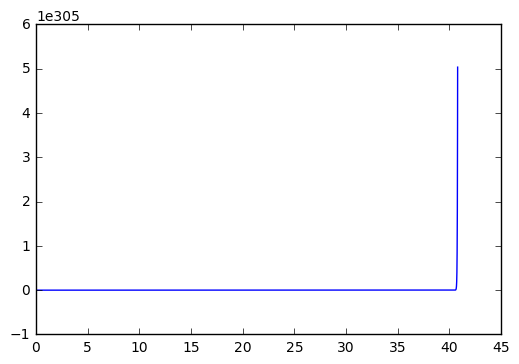

In [20]:
plt.plot(t, v_axon[:,0])
plt.show()

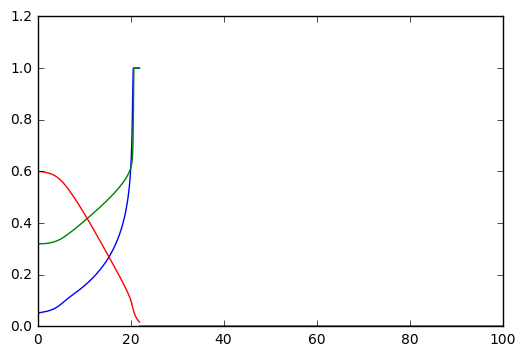

In [42]:
plt.plot(t, m)
plt.plot(t, n)
plt.plot(t, h)
plt.show()


C:\Users\Huayi\Anaconda3\lib\site-packages\ipykernel\__main__.py:64: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Huayi\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Huayi\Anaconda3\lib\site-packages\ipykernel\__main__.py:59: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Huayi\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Huayi\Anaconda3\lib\site-packages\ipykernel\__main__.py:60: RuntimeWarning: divide by zero encountered in double_scalars


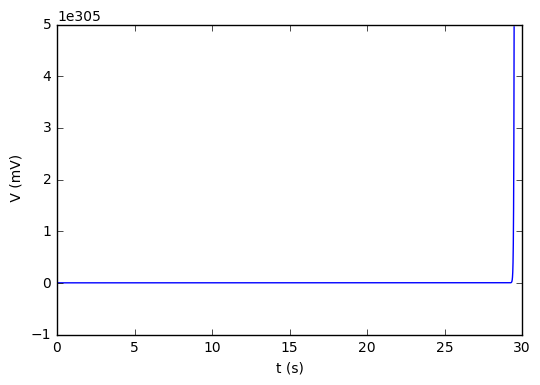

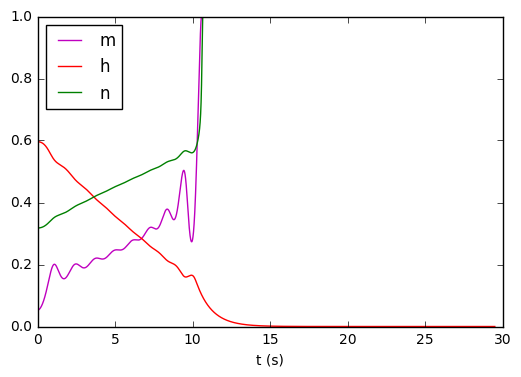

In [29]:
def HH(Ie_ov_A = None):
    # setting default value of Ie_ov_A. 
    if Ie_ov_A == None:
        Ie_ov_A = 200
    else:
        Ie_ov_A = Ie_ov_A 
    
    # variables related to n
    an=lambda v: 0.01*(v + 55)/ (1 - np.exp(-0.1*(v+55))) if v != -55 else 0.01
    bn= lambda v: 0.125 * np.exp(- 0.0125*(v + 65))
    n_inf = lambda v: an(v)/(an(v) + bn(v))
    tau_n = lambda v: 1/(an(v) + bn(v))
    
    # variables related to m
    am=lambda v: 0.1*(v + 40)/ (1 - np.exp(-0.1*(v + 40))) if v != -40 else 0.1
    bm= lambda v: 4* np.exp(- 0.0556 * (v + 65))
    m_inf = lambda v: am(v)/(am(v) + bm(v))
    tau_m = lambda v: 1/(am(v) + bm(v))

    # variables related to h
    ah=lambda v: 0.07 * np.exp(- 0.05 * (v + 65)) 
    bh= lambda v: 1/(1 + np.exp(- 0.1*(v + 35)))
    h_inf = lambda v: ah(v)/(ah(v) + bh(v))
    tau_h = lambda v: 1/(ah(v) + bh(v))


    T = 100 #ms
    cm = 10 
    EL = -54.387
    EK = -77 
    ENa = 50
    # to get the unit right
    gL_bar = 0.003 * 1000 # in uS/mm^2
    gK_bar = 0.36 * 1000 #  in uS/mm^2
    gNa_bar = 1.2 * 1000 #  in uS/mm^2

    # initial values 
    vi = -65
    mi = 0.0529
    hi = 0.5961
    ni = 0.3177

    # set time
    dt =  0.0001
    t = np.arange(0, T, dt)

    v = np.zeros(len(t))
    m = np.zeros(len(t))
    h = np.zeros(len(t))
    n = np.zeros(len(t))

    v[0] = vi
    m[0] = mi
    h[0] = hi
    n[0] = ni
    cnt = 0

    for i in np.arange(1,len(t)):
        n[i] =  n_inf(v[i-1]) + (n[i-1] - n_inf(v[i-1])) * np.exp(-dt/tau_n(v[i-1]))
        m[i] =  m_inf(v[i-1]) + (m[i-1] - m_inf(v[i-1])) * np.exp(-dt/tau_m(v[i-1]))
        h[i] =  h_inf(v[i-1]) + (h[i-1] - h_inf(v[i-1])) * np.exp(-dt/tau_h(v[i-1]))
        #simplify the equation cm * dv/dt = - Im + Ie/A to the form cm * dv/dt = coA (-v) + coB. 
        # (cm/ coA) * dv/dt = -v  + coB/coA. Then, v can be integrated by the exponential method. 
        Im = gL_bar*(EL - v[i-1]) + gK_bar* np.power(n[i-1],4)*(EK - v[i-1]) + gNa_bar*np.power(m[i-1],3)*h[i-1]*(ENa - v[i-1])
  
        dv = dt/cm*(-Im + Ie_ov_A) 
        v[i] =v[i-1] + dv 
        #coA = (gL_bar + gK_bar* np.power(n[i-1],4) + gNa_bar*np.power(m[i-1],3)*h[i-1])
        #coB = (gL_bar* EL + gK_bar* np.power(n[i-1],4)* EK + gNa_bar*np.power(m[i-1],3)*h[i-1]*ENa) + Ie_ov_A 
        #v[i] = coB/coA + (v[i-1] - coB/coA) * np.exp(-dt/(cm/coA))
        # detect spike when v[i] turn positive for the first time
        if (v[i-1]<0 and v[i]>0):
            cnt += 1
    if cnt == 0: 
        frate = 0
    else: 
        frate = cnt/(T/1000) # from "ms" to "s" to get Hz
    return (m,h,n,v,t,frate)

m,h,n,v,t,frate = HH()
plt.figure()
plt.plot(t,v)
plt.xlabel("t (s)")
plt.ylabel(" V (mV)")
plt.show()

plt.figure()
plotm, = plt.plot(t,m, color = 'm',  label='m' )
ploth, = plt.plot(t,h, color = 'r',  label='h' )
plotn, = plt.plot(t,n, color = 'g',  label='n' )
plt.xlabel('t (s)')
plt.legend(handles=[plotm, ploth, plotn], loc=2)
plt.show()